세부 주제: 경기에 따른 범죄율, 자살률 비교분석
    *  GNI가 변화하는 것에 따른 범죄율, 자살률의 변화를 비교분석.
    [자료출처]
    * GNI 데이터: 통계청  
        https://www.index.go.kr/unify/idx-info.do?idxCd=4221
    * 범죄율, 자살률 자료 출처: e-나라지표
        https://www.index.go.kr/unity/potal/eNara/main/EnaraMain.do?cdNo=000
    

1) 자살률 = (자살로 인한 사망자수 ÷ 주민등록연앙인구) × 100,000./ 인구수

2) 형법범죄율 = (형법범죄 발생건수 ÷ 총인구) × 100,000./ 범죄건수

3) 1인당 실질(명목) 국민총소득= 실질(명목) 국민총소득 ÷ 총인구./ 인구수

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

FILE = './data/범죄율.xlsx'
crime = pd.read_excel(FILE)


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [24]:
# 가져온 crime데이터를 확인하려고 head를 써서 25줄 봤다
crime.head(15)

,통계표명:,형법범죄율,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,단위:,건/인구 십만 명당,NaN,NaN,NaN,NaN,NaN
1,NaN,전체 형법범죄,주요 형법범죄,NaN,NaN,NaN,NaN
2,NaN,NaN,살인,강도,성폭력(강간 포함),폭행,절도
3,2004,"1,720.0",2.3,12.0,23.1,36.2,322.1
4,2005,"1,714.0",2.3,10.9,24.4,40.4,396.6
5,2006,"1,709.0",2.2,9.7,28.0,132.6,393.8
6,2007,"1,736.0",2.3,9.2,28.0,200.5,436.6
7,2008,"1,830.0",2.3,9.8,30.8,220.1,455.1
8,2009,"2,014.0",2.8,12.9,32.8,234.3,520.6
9,2010,"1,895.0",2.5,8.9,40.2,221.1,540.8


In [25]:
# crime의 정보 확인 
crime.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   통계표명:       21 non-null     object
 1   형법범죄율       24 non-null     object
 2   Unnamed: 2  20 non-null     object
 3   Unnamed: 3  19 non-null     object
 4   Unnamed: 4  19 non-null     object
 5   Unnamed: 5  19 non-null     object
 6   Unnamed: 6  19 non-null     object
dtypes: object(7)
memory usage: 1.5+ KB


In [26]:
# 내가 쓰고 싶은 실제년도 데이터를 쓰기위해 열 3번 인덱스부터 20번 인덱스까지 나머지 삭제/복사본 반환(2021년까지 빼야해서 숫자세보면 20번인덱스까지)
# 총 24개의 인덱스니까 뺄거 적어주기, inplace=True는 복사본
crime.drop([0,1,2,21,22,23,24], inplace=True)
crime

,통계표명:,형법범죄율,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
3,2004,"1,720.0",2.3,12.0,23.1,36.2,322.1
4,2005,"1,714.0",2.3,10.9,24.4,40.4,396.6
5,2006,"1,709.0",2.2,9.7,28.0,132.6,393.8
6,2007,"1,736.0",2.3,9.2,28.0,200.5,436.6
7,2008,"1,830.0",2.3,9.8,30.8,220.1,455.1
8,2009,"2,014.0",2.8,12.9,32.8,234.3,520.6
9,2010,"1,895.0",2.5,8.9,40.2,221.1,540.8
10,2011,"1,997.0",2.4,8.1,44.1,246.9,563.8
11,2012,"2,069.0",2.0,5.3,42.5,255.2,583.8
12,2013,"2,098.0",1.9,4.0,53.4,250.9,576.7


In [27]:
# 필요없는 열 삭제, 컬럼명을 변경
crime=crime.drop(columns=crime.columns[[2,3,4,5,6]]).rename(columns={'통계표명:':'year','형법범죄율':'criminal'}).reset_index(drop=True)
crime

,year,criminal
0,2004,"1,720.0"
1,2005,"1,714.0"
2,2006,"1,709.0"
3,2007,"1,736.0"
4,2008,"1,830.0"
5,2009,"2,014.0"
6,2010,"1,895.0"
7,2011,"1,997.0"
8,2012,"2,069.0"
9,2013,"2,098.0"


In [28]:
# 범죄율은 10만명당 범죄 횟수이기 때문에 .0을 때줘야한다
crime.criminal = crime.criminal.apply(lambda x: x.replace(',', '')[:4])
crime

,year,criminal
0,2004,1720
1,2005,1714
2,2006,1709
3,2007,1736
4,2008,1830
5,2009,2014
6,2010,1895
7,2011,1997
8,2012,2069
9,2013,2098


In [29]:
# 범죄율 컬럼을 int타입으로 바꿔줌
crime.criminal = crime.criminal.astype('int')
crime

,year,criminal
0,2004,1720
1,2005,1714
2,2006,1709
3,2007,1736
4,2008,1830
5,2009,2014
6,2010,1895
7,2011,1997
8,2012,2069
9,2013,2098


In [30]:
# crime의 정보를 확인
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      18 non-null     object
 1   criminal  18 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 344.0+ bytes


In [31]:
# 자살률 불러오기
FILE2='./data/자살률.xlsx'
death=pd.read_excel(FILE2)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [32]:
# 데이터파일 보기
death

,통계표명:,성별 및 연령집단별 자살률,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,단위:,인구 십만 명당,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
2,전체,NaN,23.9,24.8,22.0,24.9,26.0,31.0,31.2,31.7,28.1,28.5,27.3,26.5,25.6,24.3,26.6,26.9,25.7,26.0
3,성,남자,32.6,33.1,29.7,31.6,33.4,39.9,41.4,43.3,38.2,39.8,38.4,37.5,36.2,34.9,38.5,38.0,35.5,35.9
4,NaN,여자,15.0,16.6,14.2,18.2,18.7,22.1,21.0,20.1,18.0,17.3,16.1,15.5,15.0,13.8,14.8,15.8,15.9,16.2
5,연령집단,10-19세,3.8,4.3,3.5,4.6,4.6,6.5,5.2,5.5,5.1,4.9,4.5,4.2,4.9,4.7,5.8,5.9,6.5,7.1
6,NaN,20-29세,14.1,17.9,14.0,21.3,22.6,25.3,24.4,24.3,19.5,18.0,17.8,16.4,16.4,16.4,17.6,19.2,21.7,23.5
7,NaN,30-39세,20.7,21.8,17.0,22.5,24.7,31.4,29.6,30.5,27.3,28.4,27.9,25.1,24.6,24.5,27.5,26.9,27.1,27.3
8,NaN,40-49세,29.6,28.4,25.0,26.5,28.4,32.8,34.1,34.0,30.9,32.7,32.4,29.9,29.6,27.9,31.5,31.0,29.2,28.2
9,NaN,50-59세,38.2,34.7,33.6,31.3,32.9,41.1,40.1,41.2,35.3,38.1,36.4,34.3,32.5,30.8,33.4,33.3,30.5,30.1


In [33]:
# 1,2번 열을 빼고, 컬럼열의 '통계명','성별 및 연령집단별 자살률'뺀다. 열과 행을 
death=death.iloc[[1,2]].drop(labels=['통계표명:','성별 및 연령집단별 자살률'],axis=1).T.reset_index().rename(columns={1:'year',2:'suicide'}).drop('index',axis=1)
death

,year,suicide
0,2004.0,23.9
1,2005.0,24.8
2,2006.0,22.0
3,2007.0,24.9
4,2008.0,26.0
5,2009.0,31.0
6,2010.0,31.2
7,2011.0,31.7
8,2012.0,28.1
9,2013.0,28.5


In [34]:
# year을 object로 만들어줄려고 float타입의  year를 str로 만들어줌
death.year = death.year.apply(lambda x: str(float(x))[:4])
death

,year,suicide
0,2004,23.9
1,2005,24.8
2,2006,22.0
3,2007,24.9
4,2008,26.0
5,2009,31.0
6,2010,31.2
7,2011,31.7
8,2012,28.1
9,2013,28.5


In [35]:
death.info()
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     18 non-null     object 
 1   suicide  18 non-null     float64
dtypes: float64(1), object(1)
memory usage: 416.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      18 non-null     object
 1   criminal  18 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 344.0+ bytes


In [36]:
FILE3 = './data/GNI_excel.xlsx'
Gni = pd.read_excel(FILE3, header=2, index_col=1, nrows = 4)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [37]:
Gni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 명목/원화 to 증가율 3)
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1 non-null      object
 1   2004        4 non-null      object
 2   2005        4 non-null      object
 3   2006        4 non-null      object
 4   2007        4 non-null      object
 5   2008        4 non-null      object
 6   2009        4 non-null      object
 7   2010        4 non-null      object
 8   2011        4 non-null      object
 9   2012        4 non-null      object
 10  2013        4 non-null      object
 11  2014        4 non-null      object
 12  2015        4 non-null      object
 13  2016        4 non-null      object
 14  2017        4 non-null      object
 15  2018        4 non-null      object
 16  2019        4 non-null      object
 17  2020        4 non-null      object
 18  2021        4 non-null      object
dtypes: object(19)
memory usage: 640.0+ bytes


In [38]:
GNI_=Gni.iloc[2, 1:].reset_index().rename(columns = {'index' : 'year', '실질/원화': 'gni'})
GNI_

,year,gni
0,2004,"2,331.5"
1,2005,"2,383.0"
2,2006,"2,464.9"
3,2007,"2,592.0"
4,2008,"2,582.2"
5,2009,"2,632.6"
6,2010,"2,808.3"
7,2011,"2,832.1"
8,2012,"2,899.7"
9,2013,"2,997.5"


In [39]:
GNI_.gni= GNI_.gni.apply(lambda x: float(x.replace(',', '')))
GNI_

,year,gni
0,2004,2331.5
1,2005,2383.0
2,2006,2464.9
3,2007,2592.0
4,2008,2582.2
5,2009,2632.6
6,2010,2808.3
7,2011,2832.1
8,2012,2899.7
9,2013,2997.5


In [40]:
value=pd.merge(death,GNI_)
value


,year,suicide,gni
0,2004,23.9,2331.5
1,2005,24.8,2383.0
2,2006,22.0,2464.9
3,2007,24.9,2592.0
4,2008,26.0,2582.2
5,2009,31.0,2632.6
6,2010,31.2,2808.3
7,2011,31.7,2832.1
8,2012,28.1,2899.7
9,2013,28.5,2997.5


In [41]:
value2=pd.merge(crime,GNI_,left_on='year',right_on='year')
value2

,year,criminal,gni
0,2004,1720,2331.5
1,2005,1714,2383.0
2,2006,1709,2464.9
3,2007,1736,2592.0
4,2008,1830,2582.2
5,2009,2014,2632.6
6,2010,1895,2808.3
7,2011,1997,2832.1
8,2012,2069,2899.7
9,2013,2098,2997.5


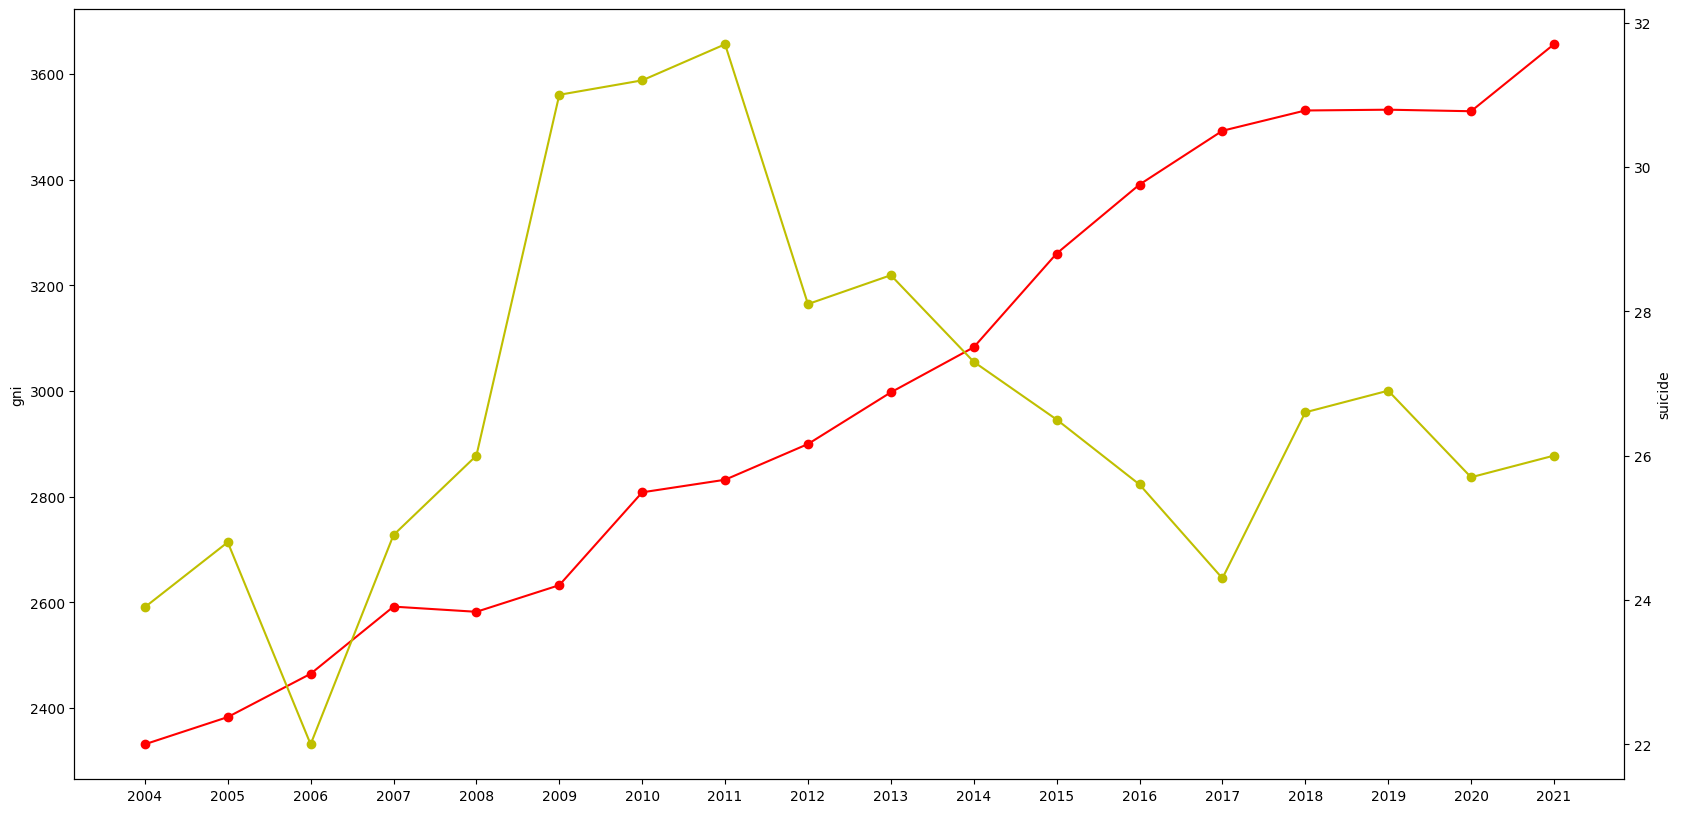

In [42]:
fig, ax1 = plt.subplots(figsize = (20, 10))
ax2 = ax1.twinx()

ax1.plot(value.year, value.gni, 'ro-', label = 'GNI')
ax2.plot(value.year, value.suicide, 'yo-', label = 'suicide')

ax1.set_ylabel('gni')
ax2.set_ylabel('suicide')

plt.show()

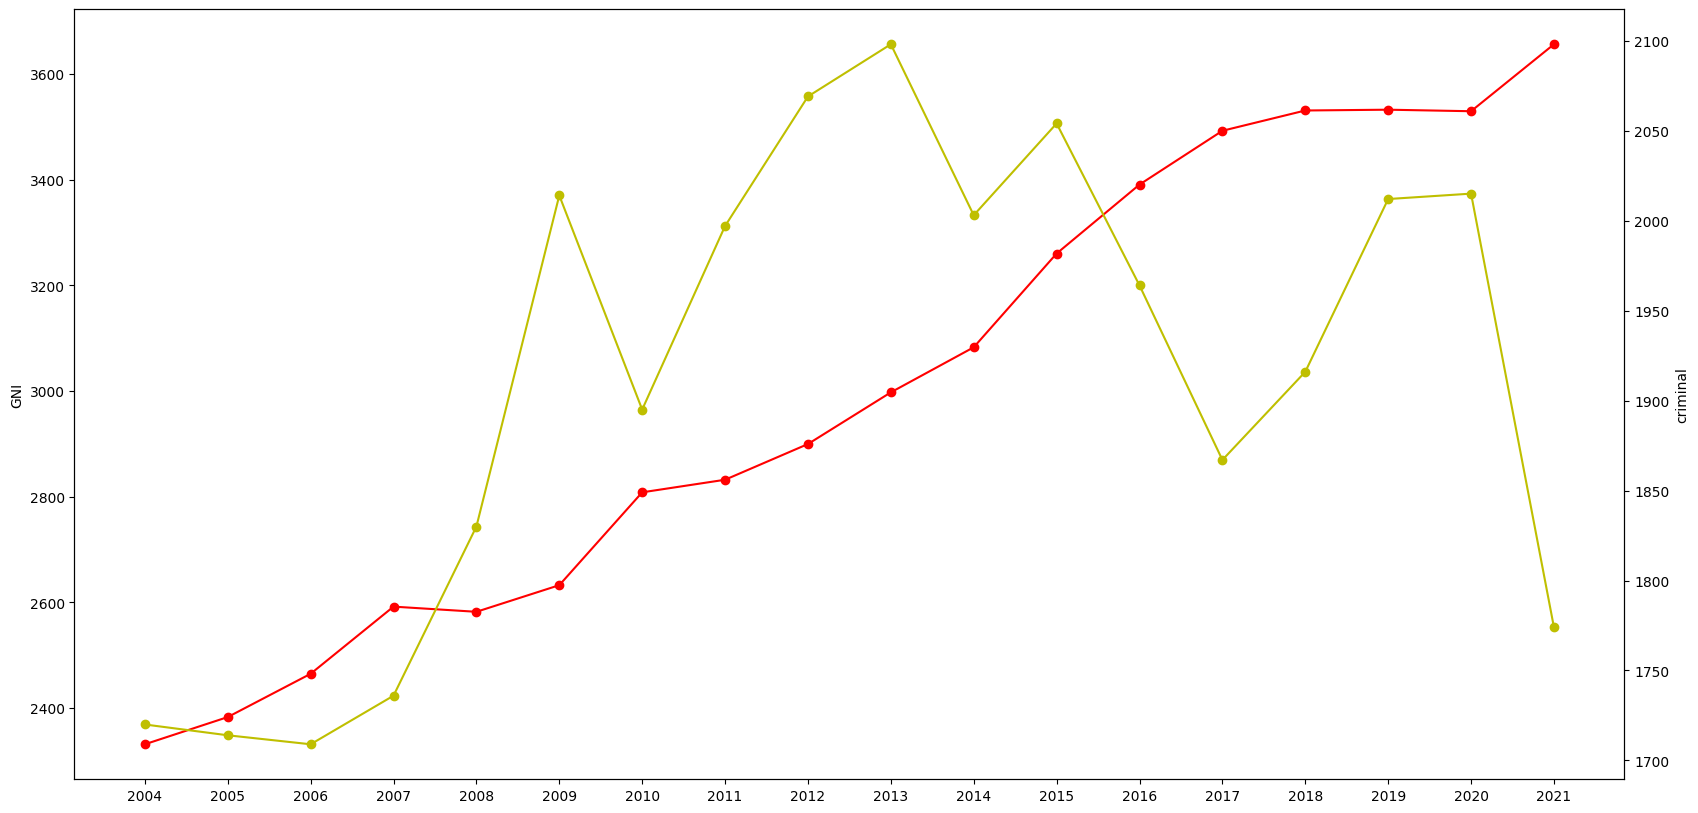

In [43]:
fig, ax1 = plt.subplots(figsize = (20, 10))
ax2 = ax1.twinx()

ax1.plot(value2.year, value2.gni, 'ro-', label = 'GNI')
ax2.plot(value2.year, value2.criminal, 'yo-', label = 'criminal')

ax1.set_ylabel('GNI')
ax2.set_ylabel('criminal')

plt.show()

In [44]:
# 자살률과 GNI와의 상관관계 구하기 
cor=value.corr(method='pearson')
cor

C:\Users\USER\AppData\Local\Temp\ipykernel_9852\3050265625.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=value.corr(method='pearson')


,suicide,gni
suicide,1.000000,0.030758
gni,0.030758,1.000000


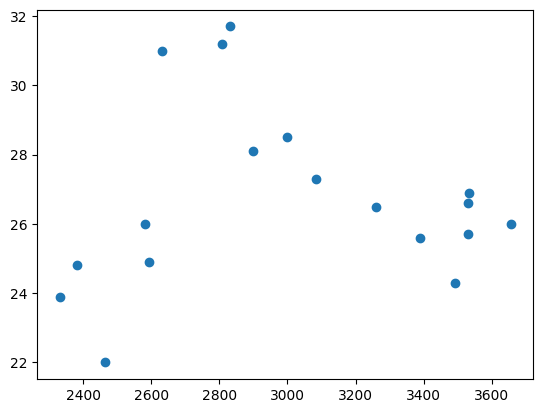

In [45]:
# 자살률은 GNI랑 관련이 낮아보인다.
plt.scatter(value.gni, value.suicide)

In [46]:
# 범죄율과 GNI와의 상관관계 구하기
cor2 = value2.corr(method='pearson')
cor2

C:\Users\USER\AppData\Local\Temp\ipykernel_9852\1560214066.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor2 = value2.corr(method='pearson')


,criminal,gni
criminal,1.000000,0.453485
gni,0.453485,1.000000


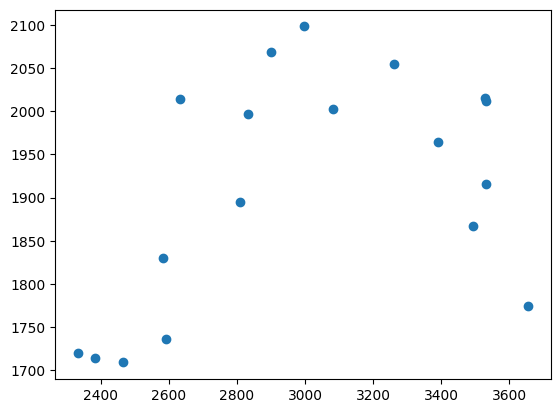

In [47]:
# 범죄율은 GNI지수와 큰 관련이 없어보인다.
plt.scatter(value2.gni, value2.criminal)

결론: - GNI지수와 범죄율, 자살률은 큰 관련이 없다.
        GNI지수와는 다르게 자살률은 2008년부터 2011년까지 대폭 증가했다 감소하고 규칙성이 없으며, 관련이 현저히 낮다고 볼 수 있다.
        오히려 이 시기에 크게 문제가된 서브프라임 모기지나 다른 경제적 요인들이 더 크게 작용하는것 같다.
        범죄율 또한 GNI지수와는 큰 관련이 없다. 오히려 범죄율은 2020년부터 급하강을 보이는데 이는 코로나로인한 격리, 거리두기등과 더 연관성이 있어보이고 GNI지수와는 큰 관련이 없어보인다.
        